In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cityData_df = pd.read_csv("data/city_data.csv")

rideData_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combinedData_df = pd.merge(cityData_df, rideData_df, on='city', how = "right")
combinedData_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Reorganizing the columns 
combinedData_df = combinedData_df[["city","date","fare","ride_id","driver_count","type"]]
combinedData_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# create new dataframes
urban_df = combinedData_df[combinedData_df["type"]=="Urban"]
urban_df
rural_df = combinedData_df[combinedData_df["type"]=="Rural"]
rural_df
suburban_df = combinedData_df[combinedData_df["type"]=="Suburban"]


In [4]:
##Average fare $ per city 
average_fare = combinedData_df.groupby(['city'])['fare'].mean().round(2)
average_fare_urban = urban_df.groupby(['city'])['fare'].mean().round(2)
average_fare_rural = rural_df.groupby(['city'])['fare'].mean().round(2)
average_fare_suburban = suburban_df.groupby(['city'])['fare'].mean().round(2)


In [5]:
## total number of rides per city
total_rides = combinedData_df.groupby(['city'])['ride_id'].count()
total_rides_urban = urban_df.groupby(['city'])['ride_id'].count()
total_rides_rural = rural_df.groupby(['city'])['ride_id'].count()
total_rides_suburban = suburban_df.groupby(['city'])['ride_id'].count()


In [6]:
# Total Number of Drivers Per City
total_drivers = combinedData_df.groupby(['city'])['driver_count'].mean()
total_drivers_urban = urban_df.groupby(['city'])['driver_count'].mean()
total_drivers_rural = rural_df.groupby(['city'])['driver_count'].mean()
total_drivers_suburban = suburban_df.groupby(['city'])['driver_count'].mean()
total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

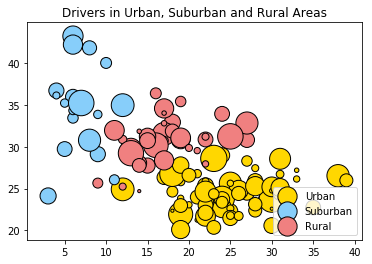

<Figure size 432x288 with 0 Axes>

In [7]:
# Obtain the x and y coordinates for each of the three city types
x_urban = total_rides_urban
y_urban = average_fare_urban
x_rural = total_rides_rural
y_rural = average_fare_rural
x_suburban = total_rides_suburban
y_suburban = average_fare_suburban

# Build the scatter plots for each city types

plt.title('Drivers in Urban, Suburban and Rural Areas');
plt.scatter(x_urban,y_urban, s = 10*total_drivers,c="gold",marker="o",edgecolors="black", label="Urban")
plt.scatter(x_rural,y_rural, s = 10*total_drivers,c="lightskyblue",marker="o",edgecolors="black", label="Suburban")
plt.scatter(x_suburban,y_suburban, s = 10*total_drivers,c="lightcoral",marker="o",edgecolors="black", label="Rural")

# Create a legend
plt.legend(loc="lower right")
plt.show()

# Save Figure
plt.savefig("../Images/Bubble_Plot_Ride_Sharing.png")

## Total Fares by City Type

In [8]:
fares_combined_df = combinedData_df.groupby(['type']).sum()
fares_combined_df

,fare,ride_id,driver_count
type,,,
Rural,4327.93,580968240341287,537
Suburban,19356.33,3106884522576766,8570
Urban,39854.38,7919412664056093,59602


In [9]:
# Percent of Fares by City Type
total_fares_df = combinedData_df["fare"].sum()
total_fares = combinedData_df.groupby(['type'])['fare'].sum
total_fares_urban = urban_df.groupby(['type'])['fare'].sum
total_fares_rural = rural_df.groupby(['type'])['fare'].sum
total_fares_suburban = suburban_df.groupby(['type'])['fare'].sum
total_fares_df

63538.64

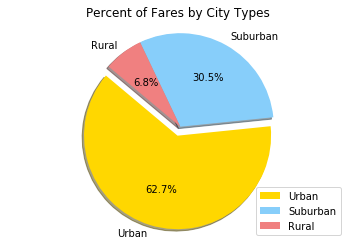

<Figure size 432x288 with 0 Axes>

In [12]:
# Calculate Percents of Fare by City Types
total_fares_urban = urban_df['fare'].sum()
total_fares_suburban = suburban_df['fare'].sum()
total_fares_rural = rural_df['fare'].sum()

# Build Pie Chart
plt.title('Percent of Fares by City Types');
fares = [total_fares_urban, total_fares_suburban, total_fares_rural]
labels = ["Urban", "Suburban", "Rural"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0, 0)
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.legend(loc="lower right")
plt.show()
# Save Figure
plt.savefig("../Images/Fares_by_City.png")


## Total Rides by City Type

In [ ]:
# Determine the Number of Riders by City Type

total_rides_combined_df = combinedData_df.groupby(['type']).count()
total_rides = combinedData_df.groupby(['type'])['ride_id'].count()
total_rides_urban = urban_df.groupby(['type'])['ride_id'].count()
total_rides_rural = rural_df.groupby(['type'])['ride_id'].count()
total_rides_suburban = suburban_df.groupby(['type'])['ride_id'].count()

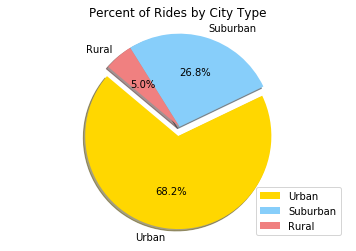

<Figure size 432x288 with 0 Axes>

In [13]:
# Calculate Percents of Rides by City Type
total_rides_urban = urban_df['ride_id'].sum()
total_rides_suburban = suburban_df['ride_id'].sum()
total_rides_rural = rural_df['ride_id'].sum()

# Build Pie Chart
plt.title('Percent of Rides by City Type');
rides = [total_rides_urban, total_rides_suburban, total_rides_rural]
labels = ["Urban", "Suburban", "Rural"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0, 0)
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.legend(loc="lower right")
plt.show()
# Save Figure
plt.savefig("../Images/Rides_by_City.png")

## Total Drivers by City Type

In [ ]:
drivers_combined_df = combinedData_df.groupby(['type']).sum()
drivers_combined_df

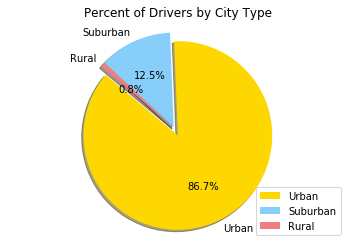

<Figure size 432x288 with 0 Axes>

In [14]:
# Calculate Percents of Drivers by City Type
total_drivers_urban = urban_df['driver_count'].sum()
total_drivers_suburban = suburban_df['driver_count'].sum()
total_drivers_rural = rural_df['driver_count'].sum()

# Build Pie Chart
plt.title('Percent of Drivers by City Type');
drivers = [total_drivers_urban, total_drivers_suburban, total_drivers_rural]
labels = ["Urban", "Suburban", "Rural"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0, 0)
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.legend(loc="lower right")
plt.show()
# Save Figure
plt.savefig("../Images/Drivers_by_City.png")